In [158]:
# !pip install kaggle

In [159]:
# from google.colab import files
# files.upload()

In [160]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [161]:
# !kaggle competitions download -c titanic

In [162]:
# !ls

In [163]:
import pandas as pd
import numpy as np

In [164]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [165]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


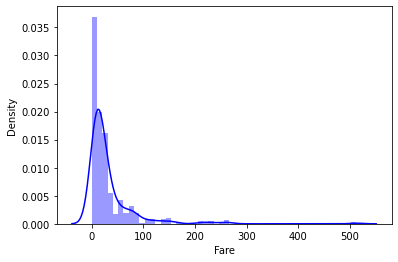

In [167]:
_ = sns.distplot(train['Fare'], color='Blue')

In [168]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [169]:
misstrain = train.isnull().sum()
misstrain = misstrain[misstrain>0]
misstest = test.isnull().sum()
misstest = misstest[misstest>0]

In [170]:
misstrain

Age         177
Cabin       687
Embarked      2
dtype: int64

In [171]:
train = train.drop(['Cabin','PassengerId','Name'],axis=1)
train['Age'] = train['Age'].fillna(train['Age'].median())#Age is a right skewness distribution
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [172]:
misstest

Age       86
Fare       1
Cabin    327
dtype: int64

In [173]:
test = test.drop(['Cabin','PassengerId','Name'],axis=1)
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])
test['Age'] = test['Age'].fillna(test['Age'].median())

In [174]:
qualifeatures = [i for i in train.columns if train.dtypes[i] == 'object']
print(qualifeatures)

['Sex', 'Ticket', 'Embarked']


In [175]:
for i in qualifeatures:
  train[i] = pd.factorize(train[i])[0]

In [176]:
for i in qualifeatures:
  test[i] = pd.factorize(test[i])[0]

In [177]:
cor = train.corr()
train_cor = cor['Survived'].to_dict()
print(train_cor)

{'Survived': 1.0, 'Pclass': -0.33848103596101586, 'Sex': 0.5433513806577526, 'Age': -0.06491041993052575, 'SibSp': -0.03532249888573588, 'Parch': 0.08162940708348222, 'Ticket': -0.0472976189186144, 'Fare': 0.2573065223849618, 'Embarked': 0.10681138570892197}


In [178]:
import_features = []
for key, value in train_cor.items():
  if ((value >= 0.05) and (value < 0.9)) or (value <= -0.05):
    import_features.append(key)
print(import_features)

['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']


In [179]:
final_train = pd.DataFrame()
final_test = pd.DataFrame()

for i in import_features:
  final_train[i] = train[i]
  final_test[i] = test[i]


In [180]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [181]:
scale = preprocessing.StandardScaler().fit(final_train)
std_train = scale.transform(final_train)
std_test = scale.transform(final_test)
y = train['Survived']

In [182]:
train_x,val_x,train_y,val_y = train_test_split(std_train,y,train_size = 0.8, random_state = 28)

In [183]:
logireg = LogisticRegression()
logireg.fit(train_x,train_y)
log_train_y = logireg.predict(train_x)
log_val_y = logireg.predict(val_x)

print('-'*10 + ' Logistic ' + '-'*10)
print('R Square for train', r2_score(train_y, log_train_y))
print('R square for Accuracy', r2_score(val_y, log_val_y))
print('MSE',mean_squared_error(val_y, log_val_y))
print('RMSE',mean_squared_error(val_y, log_val_y, squared=False))

---------- Logistic ----------
R Square for train 0.1384146139309752
R square for Accuracy 0.14877717391304324
MSE 0.19553072625698323
RMSE 0.4421885641408914


In [184]:
# logireg.score(train_x,train_y)
logireg.score(val_x,val_y)

0.8044692737430168

In [185]:
Predict = logireg.predict(std_test)

In [186]:
id  = pd.read_csv("test.csv")['PassengerId']

In [187]:
submission = pd.DataFrame()
submission['PassengerId'] = id
submission['Survived'] = Predict
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [188]:
submission.to_csv('Titanic.csv',index=False)
from google.colab import files
files.download('Titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>